In [112]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

In [113]:
crm3_final = pd.read_csv("data/crm3_final.csv", encoding = "UTF8")

In [114]:
del crm3_final["Unnamed: 0"]

In [115]:
X = crm3_final.iloc[:, 0:12]
y = crm3_final.iloc[:, 12:]

In [116]:
X

,나이,성별,건성,지성,모름,건조함,과잉피지,여드름,좁쌀,홍조&예민,복합성,기미&잡티
0,3.0,0,1,0,0,1,0,0,1,0,0,0
1,3.0,0,0,0,0,0,1,0,1,0,1,0
2,4.0,0,0,0,0,0,0,0,1,0,1,1
3,1.0,0,0,0,0,1,0,1,1,1,1,1
4,1.0,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3.0,1,0,0,0,0,0,1,0,0,1,0
3968,8.0,0,0,0,0,0,1,1,0,0,1,1
3969,3.0,0,0,1,0,0,0,1,1,1,0,0
3970,2.0,0,1,0,0,0,0,0,1,1,0,0


In [117]:
y

,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
3967,0,0,1,0,0
3968,0,0,0,0,1
3969,0,0,0,0,1
3970,0,0,0,0,1


In [118]:
X = np.array(X)
X

array([[3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 1., 0.],
       [4., 0., 0., ..., 0., 1., 1.],
       ...,
       [3., 0., 0., ..., 1., 0., 0.],
       [2., 0., 1., ..., 1., 0., 0.],
       [2., 0., 0., ..., 1., 1., 1.]])

In [119]:
y = np.array(y)
y

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=int64)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2979, 12) (993, 12) (2979, 5) (993, 5)


# KNN 

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
train_acc = []
test_acc = []

for n_neigh in range(1,50):#1~10 이웃의 갯수는 10까지 돌려봄
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X_train,y_train)
    
    train_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test,y_test))

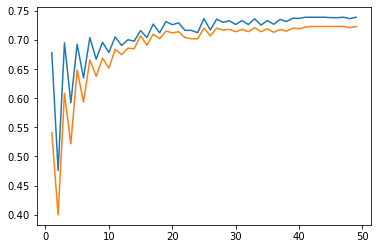

In [129]:
plt.plot(range(1,50),train_acc, label="훈련정확도")
plt.plot(range(1,50),test_acc, label="테스트 정확도")

In [135]:
clf = KNeighborsClassifier(n_neighbors=50).fit(X_train,y_train)

In [136]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [137]:
print(round(clf.score(X_train,y_train)*100,2))
print(round(clf.score(X_test,y_test)*100,2))

73.82
72.31


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3177, 12) (795, 12) (3177, 5) (795, 5)


In [12]:
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = Sequential()

model.add(layers.Dense(X.shape[1],activation="relu", input_dim=X.shape[1]))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(5, activation="sigmoid"))
model.compile(optimizer=optimizers.Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])


In [258]:
history = model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1)

Epoch 1/20
318/318 [==============================] - 0s 916us/step - loss: 0.2029 - accuracy: 0.7668
Epoch 2/20
318/318 [==============================] - 0s 853us/step - loss: 0.2024 - accuracy: 0.7658
Epoch 3/20
318/318 [==============================] - 0s 824us/step - loss: 0.2027 - accuracy: 0.7696
Epoch 4/20
318/318 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.7718
Epoch 5/20
318/318 [==============================] - 0s 812us/step - loss: 0.2097 - accuracy: 0.7633
Epoch 6/20
318/318 [==============================] - 0s 890us/step - loss: 0.2079 - accuracy: 0.7642
Epoch 7/20
318/318 [==============================] - 0s 871us/step - loss: 0.2055 - accuracy: 0.7671
Epoch 8/20
318/318 [==============================] - 0s 821us/step - loss: 0.2032 - accuracy: 0.7661
Epoch 9/20
318/318 [==============================] - 0s 862us/step - loss: 0.2053 - accuracy: 0.7639
Epoch 10/20
318/318 [==============================] - 0s 809us/step - loss: 0.2060 

# 머신러닝을 위한 전처리

In [47]:
y_test = crm3_final.iloc[:, 12:]

In [48]:
y_test

,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
3967,0,0,1,0,0
3968,0,0,0,0,1
3969,0,0,0,0,1
3970,0,0,0,0,1


In [51]:
y_test['선호제품'] = None

In [65]:
y_test.loc[y_test.미백앰플==1,'선호제품']=0
y_test.loc[y_test.수분라이트==1,'선호제품']=1
y_test.loc[y_test.수분앰플==1,'선호제품']=2
y_test.loc[y_test.쑥앰플==1,'선호제품']=3
y_test.loc[y_test.진정앰플==1,'선호제품']=4

In [66]:
y_test

,미백앰플,수분라이트,수분앰플,쑥앰플,진정앰플,선호제품
0,0,0,1,0,0,2
1,0,0,0,0,1,4
2,0,0,0,0,1,4
3,0,0,0,0,1,4
4,0,0,0,0,1,4
...,...,...,...,...,...,...
3967,0,0,1,0,0,2
3968,0,0,0,0,1,4
3969,0,0,0,0,1,4
3970,0,0,0,0,1,4


In [71]:
y = y_test['선호제품']

In [84]:
y = np.array(y,dtype=np.float64)

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3177, 12) (795, 12) (3177,) (795,)


In [95]:
model = GaussianNB().fit(X_train, y_train)

In [96]:
pred = model.predict(X_test)

In [97]:
print("정확도 :", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 : 0.1459119496855346
              precision    recall  f1-score   support

         0.0       0.17      0.03      0.04        40
         1.0       0.00      0.50      0.01         4
         2.0       0.00      0.00      0.00       138
         3.0       0.00      0.00      0.00        25
         4.0       0.75      0.19      0.31       588

    accuracy                           0.15       795
   macro avg       0.18      0.14      0.07       795
weighted avg       0.57      0.15      0.23       795



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Decision Tree
- RandomForest
- NaiveBayes
- SVM

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [107]:
kfold = KFold(n_splits=50, shuffle=True, random_state=0)

In [108]:
# Decision Tree

dtclf = DecisionTreeClassifier()
score = cross_val_score(dtclf, X,np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100,2)

[0.6375     0.6875     0.625      0.65       0.675      0.65
 0.7125     0.6375     0.7        0.6625     0.575      0.6875
 0.7625     0.55       0.5875     0.675      0.6125     0.6125
 0.5375     0.675      0.65       0.7125     0.64556962 0.67088608
 0.63291139 0.72151899 0.67088608 0.7721519  0.67088608 0.67088608
 0.56962025 0.73417722 0.65822785 0.64556962 0.6835443  0.6835443
 0.70886076 0.72151899 0.65822785 0.69620253 0.70886076 0.63291139
 0.73417722 0.65822785 0.64556962 0.65822785 0.65822785 0.69620253
 0.65822785 0.64556962]


66.37

In [109]:
# RandomForest
rfclf = RandomForestClassifier(n_estimators=300)
score = cross_val_score(rfclf, X,np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100,2)

[0.6875     0.725      0.675      0.6625     0.7        0.7375
 0.7625     0.6625     0.7375     0.6875     0.6125     0.6875
 0.7875     0.65       0.625      0.7125     0.675      0.6625
 0.5875     0.7125     0.6875     0.725      0.69620253 0.69620253
 0.64556962 0.75949367 0.6835443  0.78481013 0.73417722 0.69620253
 0.64556962 0.70886076 0.72151899 0.65822785 0.7721519  0.74683544
 0.74683544 0.74683544 0.72151899 0.70886076 0.74683544 0.70886076
 0.73417722 0.73417722 0.74683544 0.75949367 0.6835443  0.69620253
 0.6835443  0.65822785]


70.38

In [110]:
# NaiveBayes
nb = GaussianNB()
score = cross_val_score(rfclf, X,np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100,2)

[0.6875     0.7        0.675      0.6625     0.7        0.7375
 0.775      0.6625     0.7125     0.6875     0.6125     0.675
 0.8125     0.65       0.625      0.7125     0.675      0.6625
 0.5875     0.7125     0.675      0.725      0.6835443  0.70886076
 0.64556962 0.75949367 0.6835443  0.78481013 0.72151899 0.69620253
 0.64556962 0.72151899 0.72151899 0.64556962 0.73417722 0.74683544
 0.74683544 0.75949367 0.73417722 0.70886076 0.74683544 0.69620253
 0.74683544 0.72151899 0.72151899 0.75949367 0.6835443  0.69620253
 0.6835443  0.65822785]


70.17

In [106]:
# SVM
svcclf = SVC()
score = cross_val_score(rfclf, X,np.ravel(y), cv=kfold, scoring="accuracy")

print(score)
round(np.mean(score)*100,2)

[0.68341709 0.72864322 0.67002519 0.67758186 0.70277078 0.7279597
 0.68261965 0.74559194 0.73299748 0.69521411]


70.47